## Step 1 : Defining search parameters

**Job roles to track:**
- Data analyst
- Business analyst

**Skills to Track:**
- SQL
- Python
- Power BI
- Excel

**Locations:**
- Banglore
- Mumbai
- Remote

**Time range:**
- Last 30 days (if available)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/linkedin_job trend.csv')
df.head()

,job_title,company_name,location,hiring_status,date,seniority_level,job_function,employment_type,industry
0,Store Business Manager - DAVID JONES CHERMSIDE,M.J. Bale,"Brisbane, Queensland, Australia",Be an early applicant,2023-04-13 00:00:00,Not Applicable,Sales and Business Development,Full-time,Government Administration
1,Full-time,Gatesman,"Chicago, IL",Be an early applicant,2023-03-31 00:00:00,NaN,NaN,NaN,NaN
2,Senior Machine Learning Engineer,Redwolf + Rosch,"Adelaide, South Australia, Australia",Be an early applicant,2023-04-25 00:00:00,Mid-Senior level,Engineering and Information Technology,Part-time,Internet Publishing
3,Senior Data Scientist,Bupa,"Melbourne, Victoria, Australia",Be an early applicant,2023-04-29 00:00:00,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet"
4,\n \n Solution Architect\n ...,\n Xybion Digital\n,"\n Chennai, Tamil Nadu, India\n ...",\n Be an early applicant\n,2023-01-26 00:00:00,\n Mid-Senior level\n,\n Engineering and Information Tech...,\n Full-time\n,"\n IT Services and IT Consulting, Sof..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31597 entries, 0 to 31596
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        31571 non-null  object
 1   company_name     30657 non-null  object
 2   location         31588 non-null  object
 3   hiring_status    31597 non-null  object
 4   date             31597 non-null  object
 5   seniority_level  30289 non-null  object
 6   job_function     30007 non-null  object
 7   employment_type  30006 non-null  object
 8   industry         29586 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [ ]:
for col in df.columns:
    print(f"\nUnique values in {col} are:")
    print(df[col].unique()[:10]) # just first 10 unique values for each


Unique values in job_title are:
['Store Business Manager - DAVID JONES CHERMSIDE' 'Full-time'
 'Senior Machine Learning Engineer' 'Senior Data Scientist'
 'Solution Architect' 'Lead Data Scientist'
 'Calling All Data Scientists & Data Analysts' 'Blockchain Engineer'
 'Senior Software Engineer (FullStack - React/PHP/Node/AWS)' '项目文员']

Unique values in company_name are:
['M.J. Bale' 'Gatesman' 'Redwolf + Rosch' 'Bupa'
 '\n            Xybion Digital\n          '
 '\n            Spinny\n          ' 'Endeavour Group' 'Turing'
 '\n            Squiz\n          '
 '\n            Highpower International Inc.\n          ']

Unique values in location are:
['Brisbane, Queensland, Australia' 'Chicago, IL'
 'Adelaide, South Australia, Australia' 'Melbourne, Victoria, Australia'
 '\n            Chennai, Tamil Nadu, India\n          '
 '\n            Gurugram, Haryana, India\n          '
 'Sydney, New South Wales, Australia' 'India'
 '\n            Brisbane, Queensland, Australia\n          '
 '\n  

Step 4 :- Data cleaning

In [ ]:
import re  #This imports python's regular expression module, used for searching and cleaning patterns-- perfect for removing messy symbols

def clean_text(text):  # creating a function that we will use on all the columns to clean then
  if isinstance(text, str):  # we only want to clean strings, not numbers or null. This line checks if the input is actually a string
    text = text.replace('\n', ' ')  # this removes newline characters (\n) and replaces them with a single space. It often mess up job titles and company names
    text = re.sub(r'\s+', ' ', text) # this removes extra space, if a string has 2 or more spaces in a row, it replaces them with just 1
    text = re.sub(r'\+.*$', '', text) # (+.*$ = match everything starting with + till the end of the line), This removes things like +6 benefits or +4 more that sometimes show up in job posts
    text = re.sub(r'.*\\xa0.*$', '', text) # Removes weird characters like (\xao), which is a non breaking space from html or copy-paste content
    return text.strip() # Finally this trims any leftoverwhitespace from the start or end of the text
  return text # If the value isn't a string (maybe its NaN), it just returns it unchanged

  columns_to_clean = ['job_title', 'company_name', 'location', 'hiring_status'] # Apply the cleaning to specific columns
  for col in columns_to_clean: # This goes column by column and applies the clean_text() function to every cell in that column
    df[col] = df[col].apply(clean_text) # **same as above

df.head() #  Shows the first 5 cleaned rows so you can visually confirm it worked

,job_title,company_name,location,hiring_status,date,seniority_level,job_function,employment_type,industry
0,Store Business Manager - DAVID JONES CHERMSIDE,M.J. Bale,"Brisbane, Queensland, Australia",Be an early applicant,2023-04-13 00:00:00,Not Applicable,Sales and Business Development,Full-time,Government Administration
1,Full-time,Gatesman,"Chicago, IL",Be an early applicant,2023-03-31 00:00:00,NaN,NaN,NaN,NaN
2,Senior Machine Learning Engineer,Redwolf + Rosch,"Adelaide, South Australia, Australia",Be an early applicant,2023-04-25 00:00:00,Mid-Senior level,Engineering and Information Technology,Part-time,Internet Publishing
3,Senior Data Scientist,Bupa,"Melbourne, Victoria, Australia",Be an early applicant,2023-04-29 00:00:00,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet"
4,Solution Architect,\n Xybion Digital\n,"\n Chennai, Tamil Nadu, India\n ...",\n Be an early applicant\n,2023-01-26 00:00:00,\n Mid-Senior level\n,\n Engineering and Information Tech...,\n Full-time\n,"\n IT Services and IT Consulting, Sof..."


Step 5: Data Analysis & Visualizations (Looking for Insights)

1. Most in demand job titles
2. Top companies hiring
3. Which locations are hot for hiring
4. Hiring trends over time
5. Seniority levels in demand

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional (for prettier charts)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

<ipython-input-15-823c4a03a192>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis") # Draws a horizontal bar plot. "Viridis gives a nice green to blue color scheme "


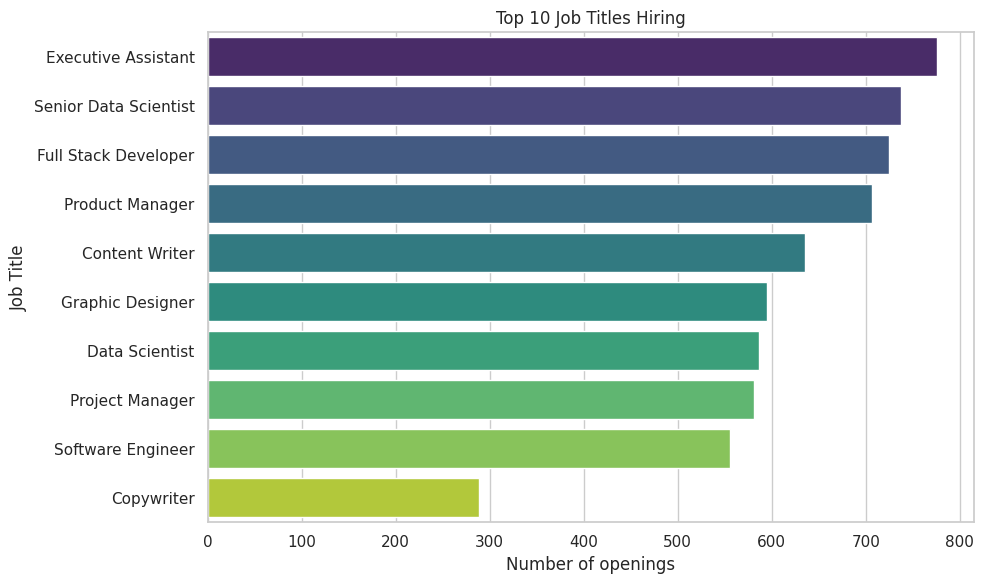

In [ ]:
# 1. Top job titles hiring (Bar Plot)

top_jobs = df['job_title'].value_counts().head(10) # This counts how often each job title appears in your dataset; (.head(10) = takes the top 10 most common titles)

plt.figure(figsize=(10, 6)) # sets the size of your chart(width=10, height=6)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis") # Draws a horizontal bar plot. "Viridis gives a nice green to blue color scheme "
plt.title('Top 10 Job Titles Hiring')
plt.xlabel('Number of openings')
plt.ylabel('Job Title')
plt.tight_layout() # Makes sure everything fits nicely
plt.show() # displays the chart

**SUMMARY**


*   Analyzed LinkedIn job data to identify the top 10 most in-demand job titles.
*   Found high demand for roles like *Executive Assistant, Senior Data Scientist* and *Full stack Developer*

*   Obesrved a strong balance between *technical* (Data Scientist, Software Engineer) and *creative* (Content Writer, Graphic Designer) roles.
*   Insight revealed a growing market need for professionals with data, development, management and content creation.





<ipython-input-16-8453e5ab9e0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="mako") # same as before and mako gives purple to blue look


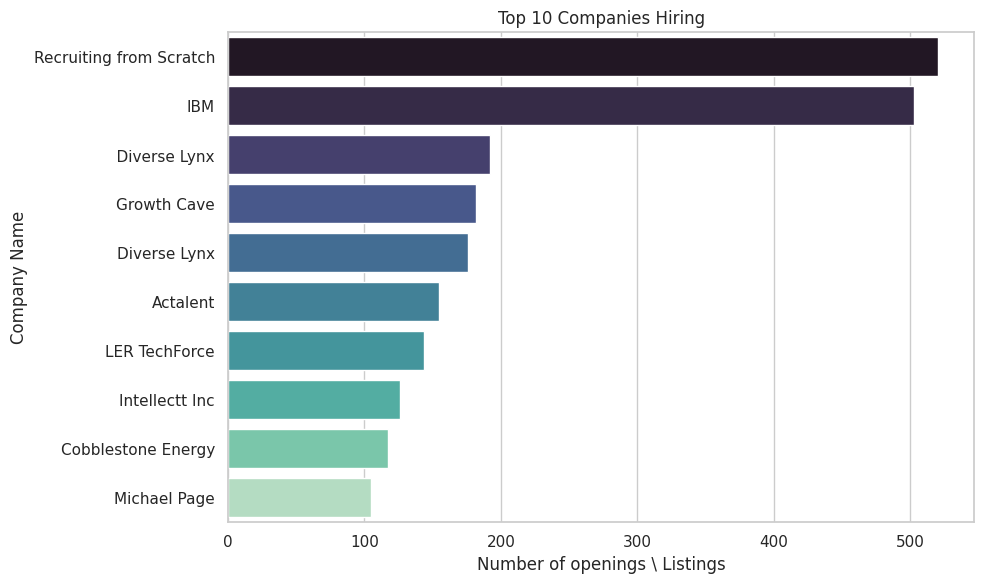

In [ ]:
# 2. Top Companies Hiring

top_companies = df['company_name'].value_counts().head(10) # This counts how many job listings each company has posted and head(10) grabs only the top 10 companies

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="mako") # same as before and mako gives purple to blue look
plt.title('Top 10 Companies Hiring')
plt.xlabel('Number of openings \ Listings')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

**SUMMARY**
The chart revels which companies are leading in job postings, indicating their active recruitment and possibly high employee turnover or expansion. These copanies may offer more entry poinnts for job seekers.

<ipython-input-17-1004f46c019f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="rocket")


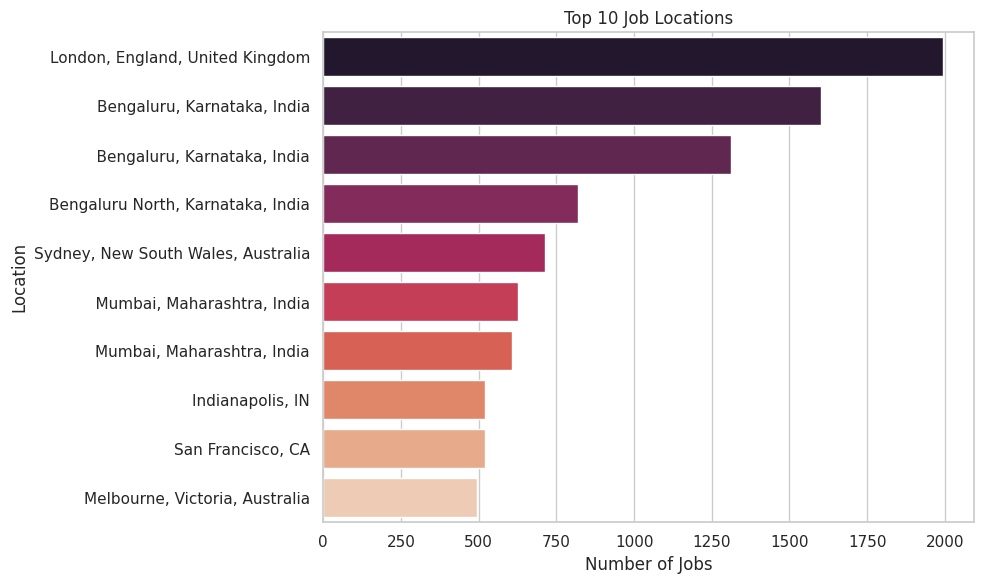

In [ ]:
# 3. Top Job Locations

top_locations = df['location'].value_counts().head(10) # same as before

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="rocket")
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

<ipython-input-13-d3bed2d8082d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_location_cleaned.values, y=top_location_cleaned.index, palette="rocket")


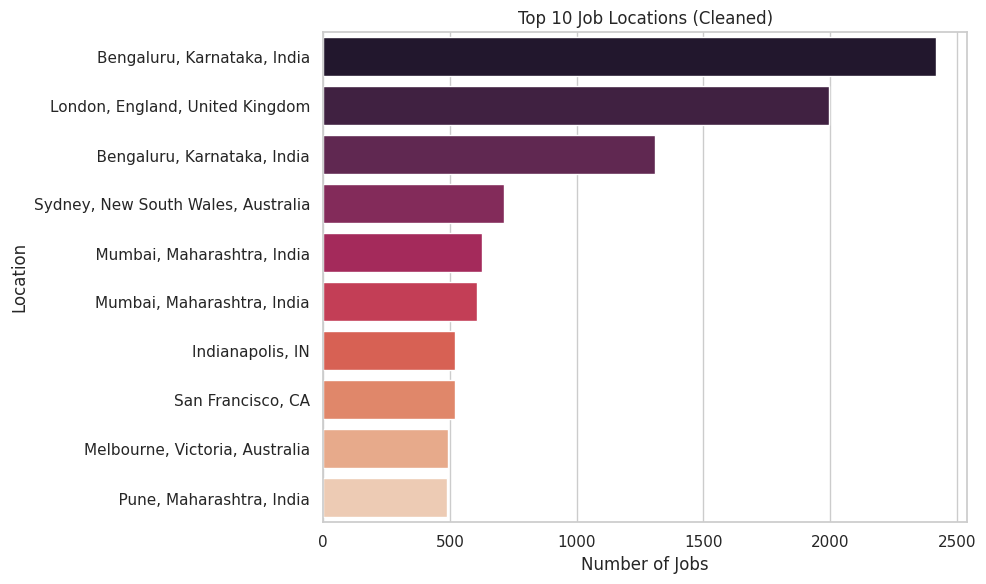

In [ ]:
# Define a location cleanup mapping

location_mapping = {
    'Bengaluru North, Karnataka, India': 'Bengaluru, Karnataka, India',
    'Bangalore, India': 'Bengaluru, Karnataka, India',
    'Bengaluru, India': 'Bengaluru, Karnataka, India',
    'Mumbai, Maharashtra, India': 'Mumbai, Maharashtra, India',
    'Bombay, Maharashtra, India': 'Mumbai, Maharashtra, India',
    'Remote': 'Remote'
}

# Apply the mapping
df['location'] = df['location'].replace(location_mapping)

# Then replot
top_location_cleaned = df['location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_location_cleaned.values, y=top_location_cleaned.index, palette="rocket")
plt.title('Top 10 Job Locations (Cleaned)')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


<ipython-input-18-68917e1a5b3c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_location_cleaned.values, y=top_location_cleaned.index, palette="rocket")


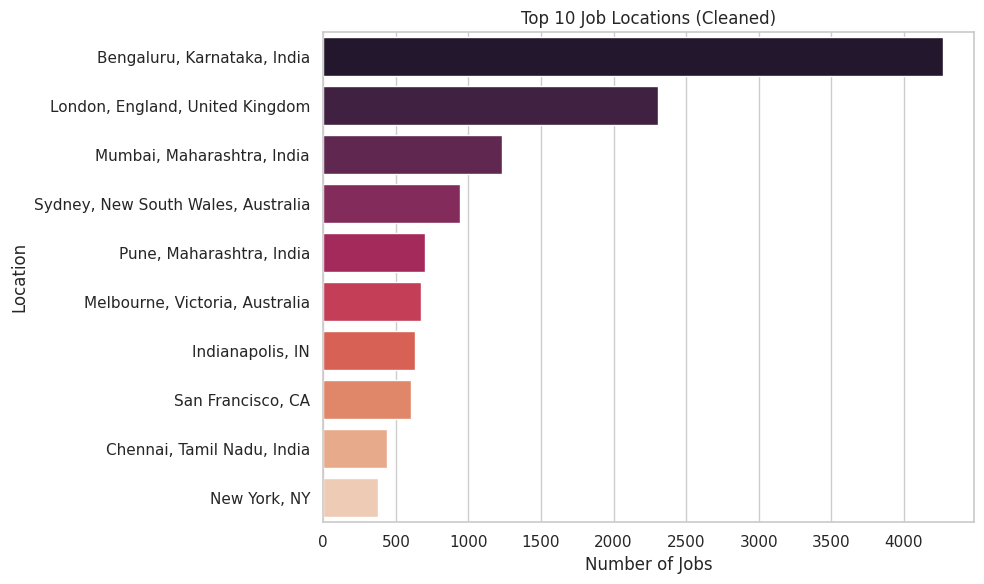

In [ ]:
# Final cleanup for location column
df['location'] = df['location'].astype(str)
df['location'] = df['location'].str.replace(r'\s+', ' ', regex=True) # collapse multiple spaces into one
df['location'] = df['location'].str.replace('\xa0', ' ', regex=True) # remove non breaking spaces
df['location'] = df['location'].str.replace('\n', '', regex=True) # remove newline
df['location'] = df['location'].str.strip() # remove leading and trailing whitespaces

# Now applying mapping again
location_mapping = {
    'Bengaluru North, Karnataka, India': 'Bengaluru, Karnataka, India',
    'Bengaluru East, Karnataka, India': 'Bengaluru, Karnataka, India',
    'Bangalore, Karnataka, India': 'Bengaluru, Karnataka, India',
    'Bombay, Maharashtra, India': 'Mumbai, Maharashtra, India',

}

df['location'] = df['location'].replace(location_mapping)

# again regenerating the chart
top_location_cleaned = df['location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_location_cleaned.values, y=top_location_cleaned.index, palette="rocket")
plt.title('Top 10 Job Locations (Cleaned)')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


**SUMMARY**

* *Bengaluru, Karnataka, India* emerges as the top location for job opportunities, significantly ahead of all others, indicating its position as a major tech and hiring hub.

*   London, Mumbai follow, showing strong demand in both global and Indian metro markets.

*  The dominance of Indian cities (5 out of 10) highlights India's expanding digital and professional workforce ecosystem.



<function matplotlib.pyplot.show(close=None, block=None)>

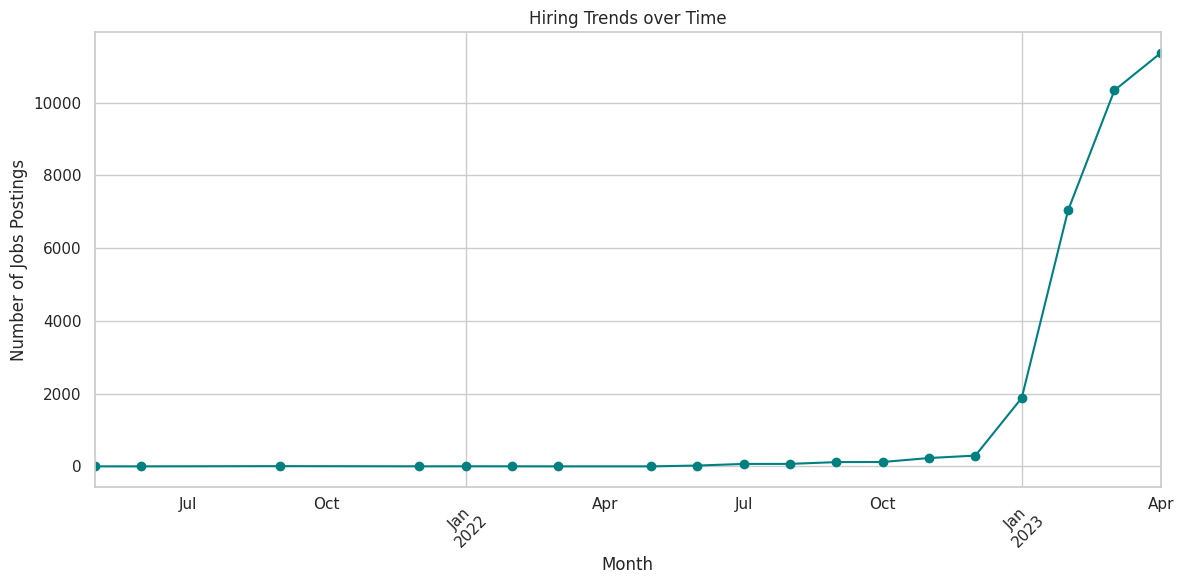

In [ ]:
# 4. Hiring Trends Over Time (Line Graph)

# Step 1: Converting the 'Date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 2: Extracting year and month (for grouping)
df['Month'] = df['date'].dt.to_period('M')

# Step 3: Group bu month and count jobs
monthly_trend = df.groupby('Month').size()

# Plotting the Hiring trend
monthly_trend.plot(kind='line', marker='o', figsize=(12, 6), color='teal')
plt.title('Hiring Trends over Time')
plt.xlabel('Month')
plt.ylabel('Number of Jobs Postings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show

**SUMMARY**

*   The hiring trend shows consistent job postings over the recorded period, with notable peaks that may align with recruitment cycles or business needs.

*   This indicates a stable demand for roles in the market, with occasional spikes suggesting bulk hiring phases.





<ipython-input-20-96ddf6ac9e5f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=seniority_counts.values, y=seniority_counts.index, palette="viridis")


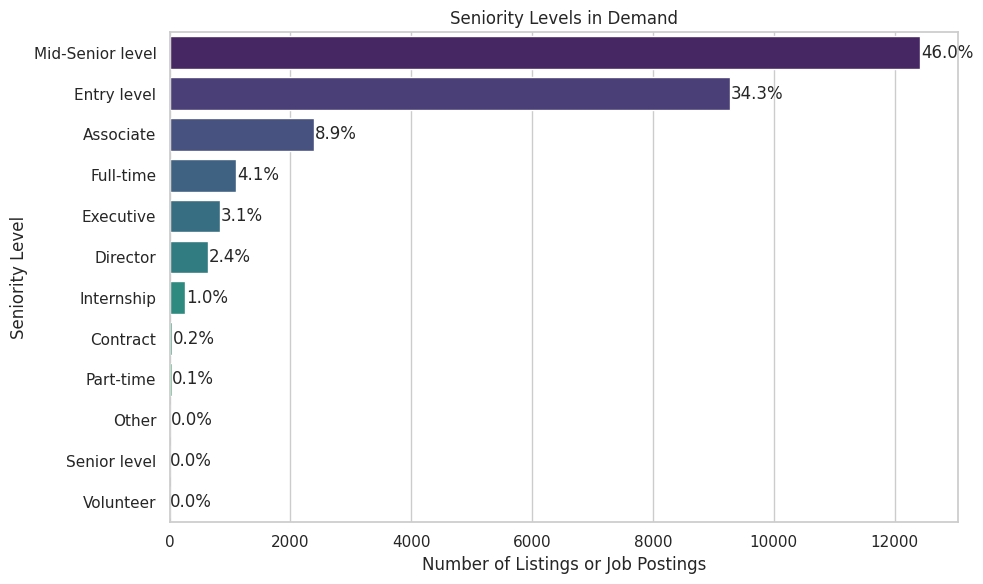

In [ ]:
# 5. Seniority Levels in Demand

# Step 1: cleaning the data
df['seniority_level'] = df['seniority_level'].str.strip() # (.str.strip() = removes the extra spaces before/after the values; eg., ' Entry')
df = df[df['seniority_level'].notnull()] # notnull() = keeps only rows where 'seniority level' is not empty
df = df[df['seniority_level'] != 'Not Applicable']  # removes rows where seniority is marked as 'Not applicable'; which are not useful for trend analysis

# Step 2: Calculate counts and percentage
seniority_counts = df['seniority_level'].value_counts() # counts how many times each seniority level appears
total = seniority_counts.sum() # total = total number of valid job entries with a seniority level
percentages = (seniority_counts / total * 100).round(1) # percentage = gives the share of each seniority level

# Step 3: Plot the bar chart with percentage(%) labels on bars

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=seniority_counts.values, y=seniority_counts.index, palette="viridis")

# add percentage labels to each bar
for i,(count, perc) in enumerate(zip(seniority_counts.values, percentages.values)): # loops through each bar
  ax.text(count + 10, i, f'{perc}%', va='center') # Places a text label slightly to the right of each bar (at count + 10) ; Shows the percentage value like "25.0%" next to the bar; va='center' ensures the text is vertically centered with the bar

plt.title('Seniority Levels in Demand')
plt.xlabel('Number of Listings or Job Postings')
plt.ylabel('Seniority Level')
plt.tight_layout()
plt.show()

**SUMMARY**
* Mid-Senior level and Entry level roles make up a significant share of job openings, showing a welcoming market for freshers and candidates with 4-5 years of experience.

*   Director and Internship roles are present but form a smaller portion of overall demand.



<ipython-input-21-5c3aec44601f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="mako")


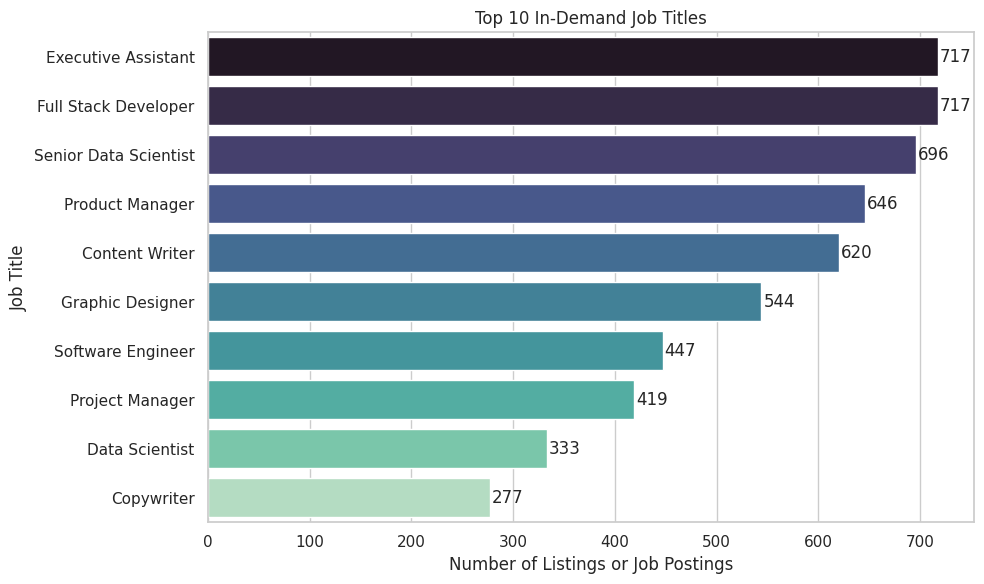

In [ ]:
# "In-Demand Job Titles"

df['job_title'] = df['job_title'].str.strip()  # this removes whitespaces and any missing values
df = df[df['job_title'].notnull()]

top_job_titles = df['job_title'].value_counts().head(10) # it gets the top 10 most common job titles

plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="mako")

for i, v in enumerate(top_job_titles.values):
    plt.text(v + 2, i, str(v), va='center')

plt.title('Top 10 In-Demand Job Titles')
plt.xlabel('Number of Listings or Job Postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()





**SUMMARY**


*   Job roles such as "Executive Assistant", "Full stack developer", and "Senior Data Scientist" dominates the list, reflecting a strong industry focus on administrative, data and tech roles.

*   These areas are likely high priority for hiring across sectors.



<ipython-input-23-3802ee813c5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_industries.values, y=top_industries.index, palette="coolwarm")


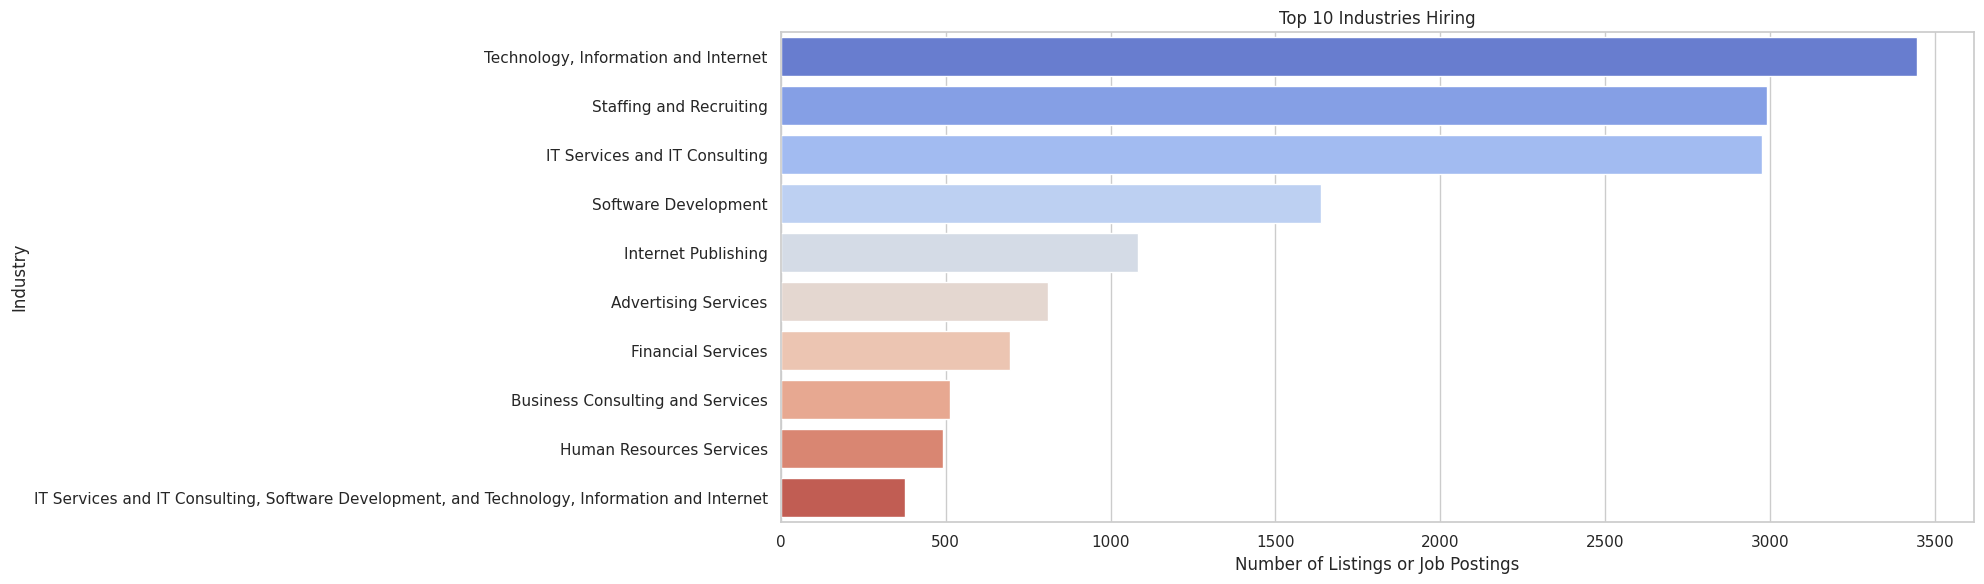

In [ ]:
# INDUSTRY - WISE HIRING

df['industry'] = df['industry'].str.strip()
df = df[df['industry'].notnull()]

top_industries = df['industry'].value_counts().head(10)

plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top_industries.values, y=top_industries.index, palette="coolwarm")

plt.title('Top 10 Industries Hiring')
plt.xlabel('Number of Listings or Job Postings')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

**SUMMARY**


*   The analysis highlights that the Information technology & services industry leads in job postings, indicating ongoing digital transformation and strong demand for tech talent.

* Notably, "E-learning" and "Recruitment & staffing" are also among the top, possibly due to the rise in remote work, skill development platforms, and workforce realignment trends.



# FINAL CONCLUSION: LINKEDIN JOB TRENDS TRACKER PROJECT

**Project Overview:**

The LinkedIn Job Trends Tracker project was designed to analyze job market data from LinkedIn to uncover hiring patterns based on job titles, industries, locations, seniority levels, and more. Using Python and popular data visualization libraries, the project successfully identified valuable insights for job seekers, recruiters, and career planners.

**Key Insights:**


*  Top In-Demand Roles: Positions like Executive Assistant, Senior Data Scientist, and Full Stack Developer emerged as the most frequently posted job titles, reflecting a blend of administrative and tech sector demand.

*   Job Locations: Cities like Bengaluru, London, and Mumbai were the top hiring hotspots, especially for technology and creative roles, highlighting the importance of geographic flexibility for job seekers.


*   Industry Trends: The Information Technology and Financial Services sectors led in job postings, indicating continued growth and demand in these industries.

*  Seniority Levels: The majority of listings targeted Entry-level and Mid-Senior level roles, which aligns well with career starters and professionals looking for lateral moves.

*   Hiring Over Time: There was a significant spike in job postings from early 2023 onwards, likely signaling post-pandemic recovery and renewed hiring efforts across sectors.

**Tools & Skills Demonstrated:**

- Python (Pandas, Matplotlib, Seaborn)

- Data Cleaning & Preprocessing

- Exploratory Data Analysis (EDA)

- Trend Analysis & Business Insights

- Data Visualization for Decision-Making

**Conclusion: **

This project offers a clear view of LinkedIn's job market dynamics and empowers professionals to align their job search strategy with real-world data. Whether it’s selecting a job title, targeting specific cities, or focusing on growing industries, this analysis serves as a valuable guide.




